<a href="https://colab.research.google.com/github/andrewwells991/mds_thesis/blob/main/15_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import linregress

In [ ]:
#Loading data
df_4 = pd.read_csv('https://raw.githubusercontent.com/andrewwells991/mds_thesis/main/data/5_applied_ml/applied_rf.csv')
df_25 = pd.read_csv('https://raw.githubusercontent.com/andrewwells991/mds_thesis/main/data/5_applied_ml/applied_ml_25.csv')

In [ ]:
#Growth rate (reference to first year) for df_4

df_4['ref_year'] = df_4.groupby('proj_site')['year'].transform('min')
df_4['rf_over_growth_ref'] = (df_4['rf_over'] - df_4.groupby('proj_site')['rf_over'].transform('first')) / df_4.groupby('proj_site')['rf_over'].transform('first')

# set the growth rate for the first year to 0 for each group
df_4.loc[df_4['year'] == df_4['ref_year'], ['rf_over_growth']] = 0

#Growth rate (annual) for df_4
df_4['rf_over_growth'] = df_4.groupby('proj_site')['rf_over'].pct_change()

In [ ]:
#Growth rate (reference to first year) for df_25

df_25['ref_year'] = df_25.groupby('proj_site')['year'].transform('min')
df_25['rf_over_growth_ref'] = (df_25['rf_over'] - df_25.groupby('proj_site')['rf_over'].transform('first')) / df_25.groupby('proj_site')['rf_over'].transform('first')

# set the growth rate for the first year to 0 for each group
df_25.loc[df_25['year'] == df_25['ref_year'], ['rf_over_growth']] = 0

#Growth rate (annual) for df_
df_25['rf_over_growth'] = df_25.groupby('proj_site')['rf_over'].pct_change()

In [ ]:
df_4

,Unnamed: 0,rf_over,year,proj_site,ref_year,rf_over_growth_ref,rf_over_growth
0,0,2837.0,2016.0,proj_2_5,2016.0,0.000000,NaN
1,1,2321.0,2017.0,proj_2_5,2016.0,-0.181882,-0.181882
2,2,6175.0,2018.0,proj_2_5,2016.0,1.176595,1.660491
3,3,2799.0,2019.0,proj_2_5,2016.0,-0.013394,-0.546721
4,4,5668.0,2020.0,proj_2_5,2016.0,0.997885,1.025009
...,...,...,...,...,...,...,...
215,1,6.0,2017.0,proj_16_3,2016.0,0.000000,0.000000
216,2,15.0,2018.0,proj_16_3,2016.0,1.500000,1.500000
217,3,14.0,2019.0,proj_16_3,2016.0,1.333333,-0.066667
218,4,20.0,2020.0,proj_16_3,2016.0,2.333333,0.428571


In [ ]:
df_4 = df_4[df_4['rf_over_growth_ref'] <= 50]

In [ ]:
df_4

,Unnamed: 0,rf_over,year,proj_site,ref_year,rf_over_growth_ref,rf_over_growth
0,0,2837.0,2016.0,proj_2_5,2016.0,0.000000,NaN
1,1,2321.0,2017.0,proj_2_5,2016.0,-0.181882,-0.181882
2,2,6175.0,2018.0,proj_2_5,2016.0,1.176595,1.660491
3,3,2799.0,2019.0,proj_2_5,2016.0,-0.013394,-0.546721
4,4,5668.0,2020.0,proj_2_5,2016.0,0.997885,1.025009
...,...,...,...,...,...,...,...
215,1,6.0,2017.0,proj_16_3,2016.0,0.000000,0.000000
216,2,15.0,2018.0,proj_16_3,2016.0,1.500000,1.500000
217,3,14.0,2019.0,proj_16_3,2016.0,1.333333,-0.066667
218,4,20.0,2020.0,proj_16_3,2016.0,2.333333,0.428571


##4 sq. kilometer ROIs

Slope: 225.78162159781536


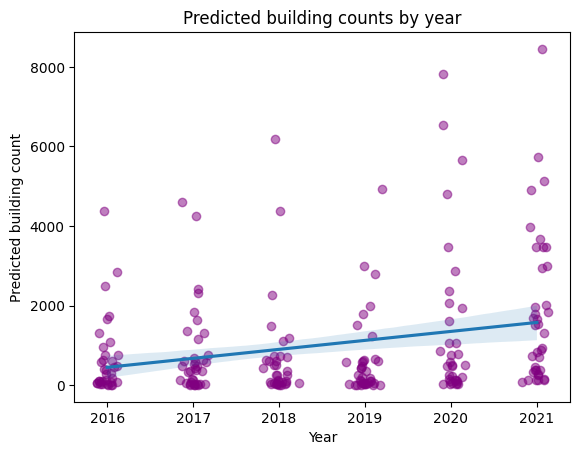

In [ ]:
# create a list of variables and colors to plot
variables = [
             'rf_over']

colors = [ 
          'purple']

# create the scatterplot with jittered x-axis values
for i, variable in enumerate(variables):
    x_jitter = np.random.normal(loc=0, scale=0.08, size=len(df_4))  
    plt.scatter(df_4['year'] + x_jitter, df_4[variable], color=colors[i], label=variable, alpha=0.5)

# add regression line with standard error
sns.regplot(data=df_4, x='year', y='rf_over', scatter=False)

# calculate and print the slope of the regression line
slope, intercept, r_value, p_value, std_err = linregress(df_4['year'], df_4['rf_over'])
print("Slope:", slope)

# add labels and legend
plt.xlabel('Year')
plt.ylabel('Predicted building count')
plt.title('Predicted building counts by year')

# show the plot
plt.show()

Slope: 0.5773986967491467


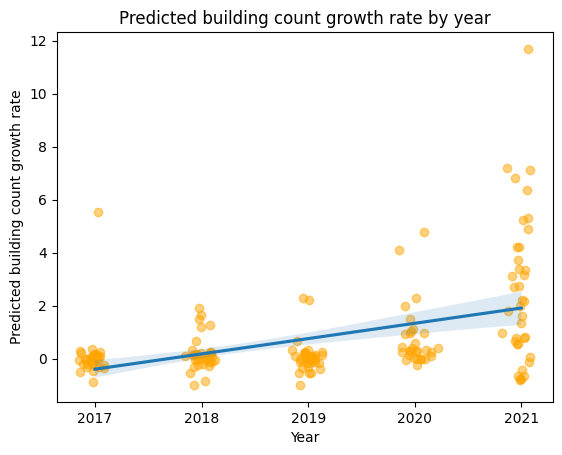

In [ ]:
# create a list of variables and colors to plot
df_4 = df_4.dropna(subset=['rf_over_growth'])
df_4 = df_4[df_4['rf_over_growth'] <= 15]

variables = [
             'rf_over_growth']

colors = [ 
          'orange']

# create the scatterplot with jittered x-axis values
for i, variable in enumerate(variables):
    x_jitter = np.random.normal(loc=0, scale=0.08, size=len(df_4))  
    plt.scatter(df_4['year'] + x_jitter, df_4[variable], color=colors[i], label=variable, alpha=0.5)

# add regression line with standard error
sns.regplot(data=df_4, x='year', y='rf_over_growth', scatter=False)

# calculate and print the slope of the regression line
slope, intercept, r_value, p_value, std_err = linregress(df_4['year'], df_4['rf_over_growth'])
print("Slope:", slope)

# add labels and legend
plt.xlabel('Year')
plt.ylabel('Predicted building count growth rate')
plt.title('Predicted building count growth rate by year')

# show the plot
plt.show()

In [ ]:
mean_rf_by_year = df_4.groupby('year')['rf_over_growth'].mean()

In [ ]:
mean_rf_by_year

year
2017.0    0.092612
2018.0    0.185965
2019.0    0.076206
2020.0    0.775311
2021.0    2.560806
Name: rf_over_growth, dtype: float64

In [ ]:
df_4

,Unnamed: 0,rf_over,year,proj_site,ref_year,rf_over_growth_ref,rf_over_growth
1,1,2321.0,2017.0,proj_2_5,2016.0,-0.181882,-0.181882
2,2,6175.0,2018.0,proj_2_5,2016.0,1.176595,1.660491
3,3,2799.0,2019.0,proj_2_5,2016.0,-0.013394,-0.546721
4,4,5668.0,2020.0,proj_2_5,2016.0,0.997885,1.025009
5,5,4912.0,2021.0,proj_2_5,2016.0,0.731406,-0.133380
...,...,...,...,...,...,...,...
215,1,6.0,2017.0,proj_16_3,2016.0,0.000000,0.000000
216,2,15.0,2018.0,proj_16_3,2016.0,1.500000,1.500000
217,3,14.0,2019.0,proj_16_3,2016.0,1.333333,-0.066667
218,4,20.0,2020.0,proj_16_3,2016.0,2.333333,0.428571


Slope: 0.6340580200921567


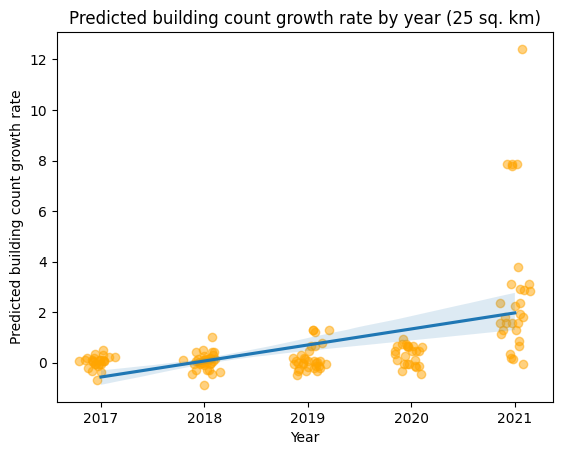

In [ ]:
# create a list of variables and colors to plot
df_25 = df_25.dropna(subset=['rf_over_growth'])
df_25 = df_25[df_25['rf_over_growth'] <= 15]
df_25 = df_25[df_25['year'] >= 2017]

variables = [
             'rf_over_growth']

colors = [ 
          'orange']

# create the scatterplot with jittered x-axis values
for i, variable in enumerate(variables):
    x_jitter = np.random.normal(loc=0, scale=0.08, size=len(df_25))  
    plt.scatter(df_25['year'] + x_jitter, df_25[variable], color=colors[i], label=variable, alpha=0.5)

# add regression line with standard error
sns.regplot(data=df_25, x='year', y='rf_over_growth', scatter=False)

# calculate and print the slope of the regression line
slope, intercept, r_value, p_value, std_err = linregress(df_25['year'], df_25['rf_over_growth'])
print("Slope:", slope)

# add labels and legend
plt.xlabel('Year')
plt.ylabel('Predicted building count growth rate')
plt.title('Predicted building count growth rate by year (25 sq. km)')

# show the plot
plt.show()

In [ ]:
mean_rf_by_year_25 = df_25.groupby('year')['rf_over_growth'].mean()

In [ ]:
mean_rf_by_year_25

year
2017.0    0.034138
2018.0    0.045844
2019.0    0.187703
2020.0    0.306485
2021.0    2.906007
Name: rf_over_growth, dtype: float64

In [ ]:
df = df_4

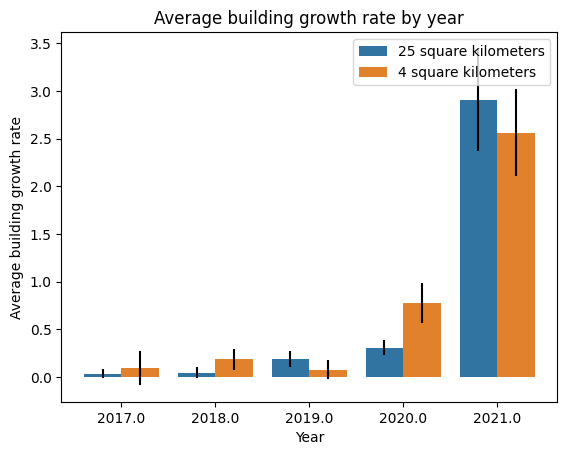

In [ ]:

# concatenate the two dataframes and add a new column called "dataset"
df_all = pd.concat([df_4.assign(dataset='df_4'), df_25.assign(dataset='df_25')])

# calculate the mean and standard error of rf_over_growth by year and dataset
mean_rf_by_year_dataset = df_all.groupby(['year', 'dataset'])['rf_over_growth'].agg(['mean', 'sem']).reset_index()

ax = sns.barplot(data=mean_rf_by_year_dataset, x='year', y='mean', hue='dataset')

# get the number of datasets
n_datasets = len(mean_rf_by_year_dataset['dataset'].unique())

# add error bars to the plot
for i, year in enumerate(mean_rf_by_year_dataset['year'].unique()):
    for j, dataset in enumerate(mean_rf_by_year_dataset['dataset'].unique()):
        sem_val = mean_rf_by_year_dataset[(mean_rf_by_year_dataset['year'] == year) & (mean_rf_by_year_dataset['dataset'] == dataset)]['sem'].values[0]
        offset = (j - (n_datasets-1)/2) * 0.4
        ax.errorbar(x=i+offset, y=mean_rf_by_year_dataset[(mean_rf_by_year_dataset['year'] == year) & (mean_rf_by_year_dataset['dataset'] == dataset)]['mean'], yerr=sem_val, color='black')

# set the axis labels and title
ax.set(xlabel='Year', ylabel='Average building growth rate', title='Average building growth rate by year')
ax.legend(title='Proximity to project')

new_labels = ['25 square kilometers', '4 square kilometers']
for t, l in zip(ax.legend().texts, new_labels): t.set_text(l)

# show the plot
plt.show()

In [ ]:
import matplotlib.ticker as mtick

# create a formatter to format the tick labels as integers
fmt = mtick.StrMethodFormatter("{x:.0f}")
ax.xaxis.set_major_formatter(fmt)

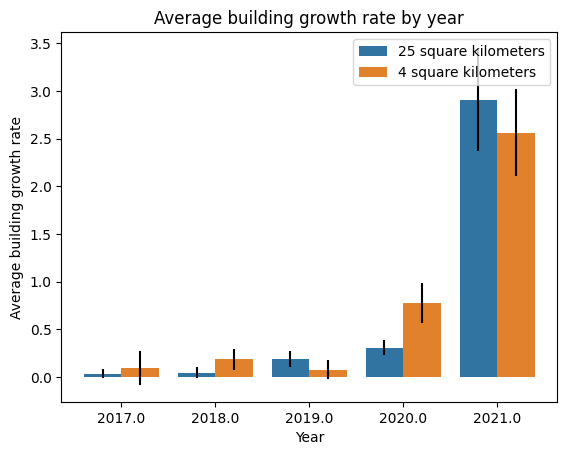

In [ ]:
# concatenate the two dataframes and add a new column called "dataset"
df_all = pd.concat([df_4.assign(dataset='df_4'), df_25.assign(dataset='df_25')])

# calculate the mean and standard error of rf_over_growth by year and dataset
mean_rf_by_year_dataset = df_all.groupby(['year', 'dataset'])['rf_over_growth'].agg(['mean', 'sem']).reset_index()

ax = sns.barplot(data=mean_rf_by_year_dataset, x='year', y='mean', hue='dataset')

# get the number of datasets
n_datasets = len(mean_rf_by_year_dataset['dataset'].unique())

# add error bars to the plot
for i, year in enumerate(mean_rf_by_year_dataset['year'].unique()):
    for j, dataset in enumerate(mean_rf_by_year_dataset['dataset'].unique()):
        sem_val = mean_rf_by_year_dataset[(mean_rf_by_year_dataset['year'] == year) & (mean_rf_by_year_dataset['dataset'] == dataset)]['sem'].values[0]
        offset = (j - (n_datasets-1)/2) * 0.4
        ax.errorbar(x=i+offset, y=mean_rf_by_year_dataset[(mean_rf_by_year_dataset['year'] == year) & (mean_rf_by_year_dataset['dataset'] == dataset)]['mean'], yerr=sem_val, color='black')

# set the axis labels and title
ax.set(xlabel='Year', ylabel='Average building growth rate', title='Average building growth rate by year')
ax.legend(title='Proximity to project', loc='upper left')

new_labels = ['25 square kilometers', '4 square kilometers']
for t, l in zip(ax.legend().texts, new_labels):
    t.set_text(l)

# show the plot
plt.show()